# **Chest Radiographs Basics**

In the process of taking the image, an x-ray passes through the body and reaches a detector on the other side. Tissues with sparse material, such as lungs which are full of air, do not absorb the X-rays and appear black in the image. Dense tissues such as bones absorb the X-rays and appear white in the image. In short -


> 
    • Black = Air
    • White = Bone
    • Grey = Tissue or Fluid

The left side of the subject is on the right side of the screen by convention. You can also see the small L at the top of the right corner. In a normal image we see the lungs as black, but they have different projections on them - mainly the rib cage bones, main airways, blood vessels and the heart.


If you are interested in the basic anatomy you can see in a chest radiograph besides the lungs you can view this [5 minutes video by QuickMedic](https://youtu.be/uo7ho8ZW2YY).

# Why to detect this
    • Pneumonia accounts for over 15% of all deaths of children under 5 years old internationally. In 2015, 920,000 children under the age of 5 died from the disease.
    • In the United States, pneumonia accounts for over 500,000 visits to emergency departments [1] and over 50,000 deaths in 2015 [2], keeping the ailment on the list of top 10 causes of death in the country.

# Symptoms to detect Pneumonia

    • The Diagnosis of pneumonia on CXR( is complicated because of a number of other conditions in the lungs such as uid overload (pulmonary edema), bleeding, volume loss (atelectasis or collapse), lung cancer, or post-radiation or surgical changes.







Characteristics | Pneumonia
--- | ---
    History | Underlying lung disease, contact with individuals having upper or lower respiratory infection, contact with birds/animals.
    Causes | Bacteria, virus, fungi; aspiration.
    Body systems | Respiratory system—lungs.
    Clinical symptoms| High fever (sometimes with chills and rigors), cough, wheezing, breathing difficulty, chest pain.
    Investigations | Blood investigations—complete blood count, ESR, sputum examination and culture, chest X-ray, CT scan, bronchoscopy, thoracocentesis, pleural fluid aspiration and culture.
    Treatments| Appropriate antimicrobial therapy, expectorant, antipyretics and analgesics, oxygen therapy (if required), fluids.


# Project Goal
    • In this competition, the primary endpoint will be the detection of bounding boxes corresponding to the diagnosis of pneumonia (e.g. lung infection) on chest radiographs, a special 2D high resolution grayscale medical image.
    • Note that pneumonia is just one of many possible disease processes that can occur on a chest radiograph, and that any given single image may contain 0, 1 or many boxes corresponding to possible pneumonia locations.

# Data Summary

Stage 2 Images - stage_2_train_images.zip and stage_1_test_images.zip
    • images for the current stage. Filenames are also patient names.
Stage 2 Labels - stage_2_train_labels.csv 
    • Which provides the IDs for the test set.
Stage 2 Detailed Info - stage_2_detailed_class_info.csv
    • contains detailed information about the positive and negative classes in the training set, and may be used to build more nuanced models.
# File descriptions
    • stage_2_train.csv - the training set. Contains patientIds and bounding box / target information.
    • stage_2_detailed_class_info.csv - provides detailed information about the type of positive or negative class for each image.
    • stage_2_train_labels.csv- provides the details of the bounidng boxes of pneumonia location on lungs.

# Data fields
    • patientId _- A patientId. Each patientId corresponds to a unique image.
    • x_ - the upper-left x coordinate of the bounding box.
    • y_ - the upper-left y coordinate of the bounding box.
    • width_ - the width of the bounding box.
    • height_ - the height of the bounding box.
    • Target_ - the binary Target, indicating whether this sample has evidence of pneumonia.


In [57]:
#@title Import and Extract Data
! pip install pydicom
import tensorflow
tensorflow.__version__
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#import pydicom
import pandas as pd
from glob import glob
import os
from matplotlib.patches import Rectangle

from google.colab import drive
drive.mount('/content/drive')
# One time task to extract dataset zip file 
'''data_folder_path = '/content/drive/My Drive/Neural Networks/'
data_path = data_folder_path + 'rsna-pneumonia-detection-challenge.zip'
from zipfile import ZipFile
with ZipFile(data_path, 'r') as z:
  z.extractall()
print('Extracted the pneumonia detection challenge zip file ')'''

#comment out if wanted to copy to grdive 
'''
!cp -r /content/stage_2_test_images /content/drive/My\ Drive/Neural\ Networks/
!cp -r /content/stage_2_train_images /content/drive/My\ Drive/Neural\ Networks/
!cd /content/drive/My\ Drive/Neural\ Networks/stage_2_test_images/;ls | wc -l
!cd /content/drive/My\ Drive/Neural\ Networks/stage_2_train_images/;ls | wc -l'''

class_details_filepath = '/content/stage_2_detailed_class_info.csv'
train_labels_filepath = '/content/stage_2_train_labels.csv'
train_data_dir = '/content/stage_2_train_images/'
#Just to test 
!cd /content/stage_2_train_images;ls | wc -l

In [90]:
#@title List sample data 
class_details_df = pd.read_csv(det_class_path)
class_details_df.sample(10)

,patientId,class
11297,75bcbe7d-2568-4010-a0ce-9de23d4d0b08,Normal
26967,eff3da42-7a80-472c-b944-11d617de6854,No Lung Opacity / Not Normal
22257,c9713628-3809-4e51-b6f5-0dd13a5f1ab4,No Lung Opacity / Not Normal
2494,323d4055-2830-433c-8585-e02ff7821a17,Lung Opacity
16379,9e9e5c6f-6176-4dc2-965c-628d874015b6,Normal
6891,527fd0ab-93d5-4a17-818c-ab312efdee27,No Lung Opacity / Not Normal
14013,8b7faeea-4312-42a0-876c-bf8b1ead07e8,Lung Opacity
11001,736d6bb1-8a77-40f6-a229-120d8a6263a2,Normal
29514,1bdb5d23-e594-4556-a8dc-0017e6bc5bf9,Normal
7497,57880594-01e6-4768-bd1c-b943840d6040,Lung Opacity


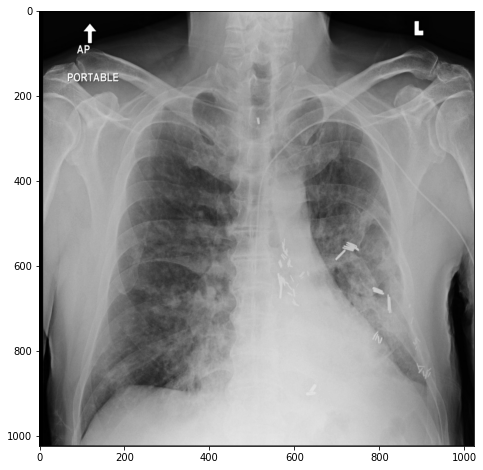

In [93]:
#@title Class Lung Opacity 

ds = pydicom.filereader.dcmread(train_data_dir + '57880594-01e6-4768-bd1c-b943840d6040.dcm')
#print(ds)
plt.figure(figsize=(10,8))
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.show()

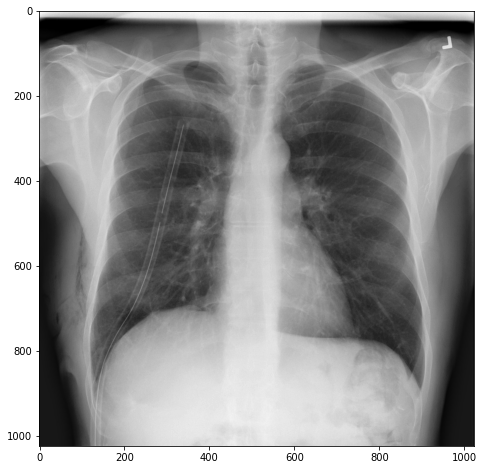

In [94]:
#@title Class Normal
ds = pydicom.filereader.dcmread(train_data_dir + '736d6bb1-8a77-40f6-a229-120d8a6263a2.dcm')
#print(ds)
plt.figure(figsize=(10,8))
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.show()

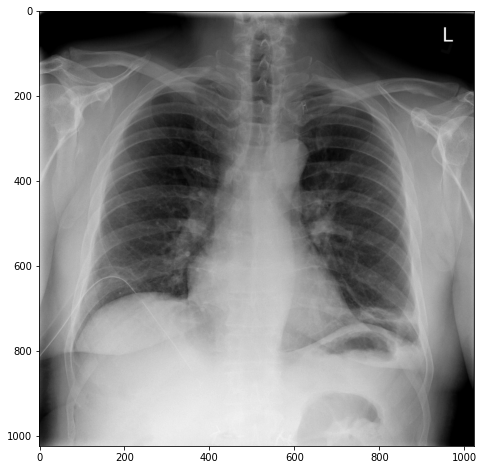

In [96]:
#@title Class No Lung Opacity / Not Normal
ds = pydicom.filereader.dcmread(train_data_dir + 'c9713628-3809-4e51-b6f5-0dd13a5f1ab4.dcm')
#print(ds)
plt.figure(figsize=(10,8))
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.show()

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64


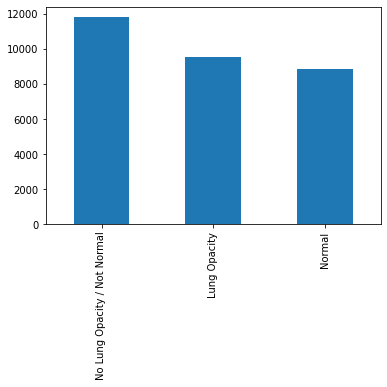

In [89]:

print(class_details_df['class'].value_counts())
class_details_df['class'].value_counts().plot.bar()

In [88]:
bbox_df = pd.read_csv(train_labels_filepath)
print(bbox_df.shape[0], 'boxes loaded')
print(bbox_df['patientId'].value_counts().shape[0], 'patient cases')
bbox_df[1]

30227 boxes loaded
26684 patient cases


KeyError: ignored

In [29]:
comb_bbox_df = pd.merge(bbox_df, det_class_df, how='inner', on='patientId')
print(comb_bbox_df.shape[0], 'combined cases')

37629 combined cases


In [30]:
comb_bbox_df.sample(3)

,patientId,x,y,width,height,Target,class
22453,ac02e9f6-af90-46e9-b9fe-a3c92eb659dc,NaN,NaN,NaN,NaN,0,Normal
24015,b32508d0-975d-4b74-8233-174fef34684c,187.0,273.0,192.0,454.0,1,Lung Opacity
19548,99122ea2-e76e-4b70-bfd9-350b8af5691a,204.0,397.0,269.0,348.0,1,Lung Opacity
